In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 52kB/s 


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Activation, Dense, Flatten
print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt

2.3.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

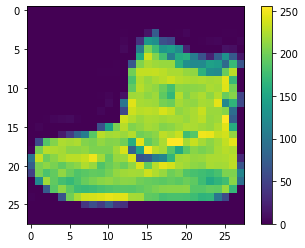

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.00 

test_images = test_images / 255.00

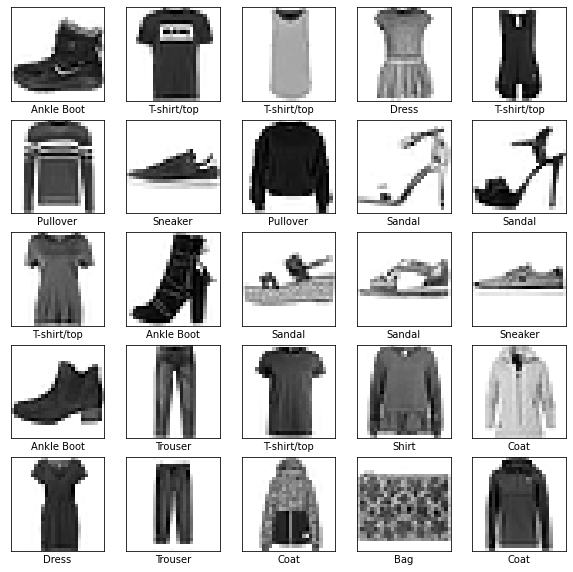

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
model = keras.Sequential()
model.add(Flatten(input_shape= (28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10))

In [14]:
model.compile(optimizer = 'adam', loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4874 - accuracy: 0.8237
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3630 - accuracy: 0.8669
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3280 - accuracy: 0.8791
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3063 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2920 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2754 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2625 - accuracy: 0.9024
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2515 - accuracy: 0.9054
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2416 - accuracy: 0.9092
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.233

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('Test accuracy:', test_acc)

313/313 - 1s - loss: 0.3395 - accuracy: 0.8869
Test accuracy: 0.886900007724762


In [17]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

In [19]:
predictions[0]

array([1.2053628e-06, 1.8468258e-07, 4.4039174e-07, 3.6752745e-08,
       1.8623854e-08, 2.0220623e-05, 1.3512690e-06, 4.3316431e-02,
       6.4361467e-07, 9.5665944e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [22]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])


  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color= 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]),color = color)


def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

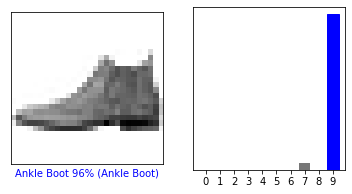

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

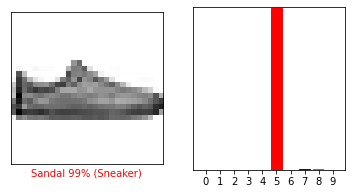

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

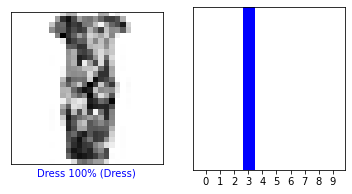

In [25]:
i = 100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

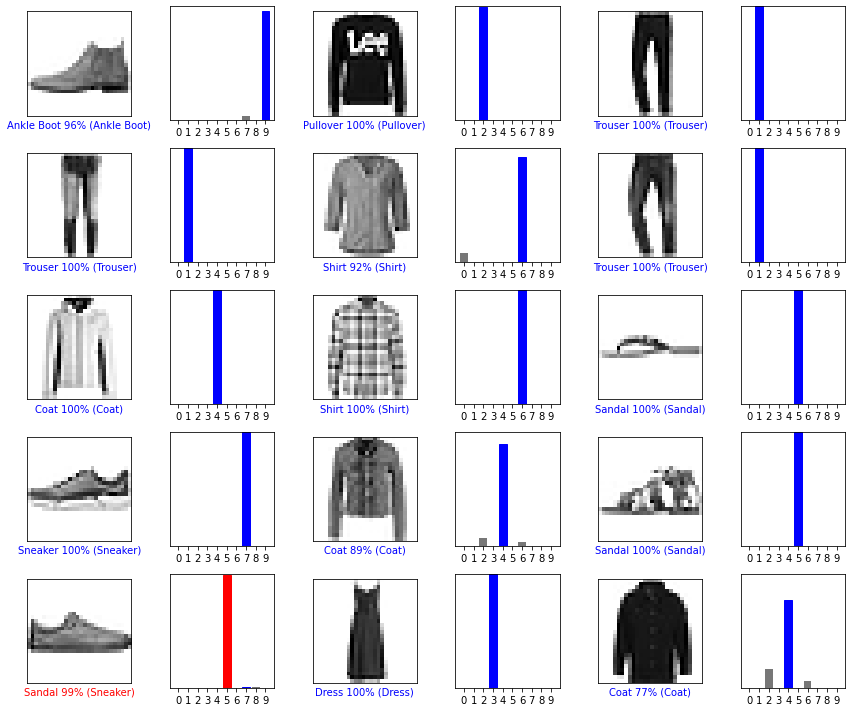

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [27]:
# Grab an image from the test dataset. 
img = test_images[1]

print(img.shape)

(28, 28)


In [28]:
#add the image to a batch where its the only member. 
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[8.3727755e-05 6.4390870e-10 9.9813771e-01 5.5230075e-06 1.4233690e-03
  2.9464518e-16 3.4965709e-04 2.8875231e-12 1.2957549e-08 1.3879925e-13]]


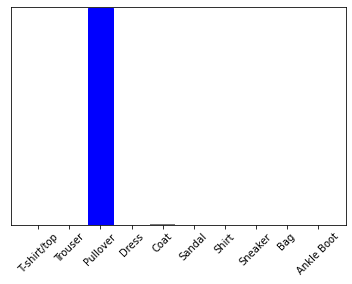

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [31]:
np.argmax(predictions_single[0])

2